In [1]:
# Import library yang diperlukan
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [2]:
# Path ke file Excel
file_path = '/content/Dataset.xlsx'

In [3]:
# Membaca file Excel
df = pd.read_excel(file_path)

In [4]:
# Menampilkan data
print("Dataset:")
print(df)

Dataset:
   Siswa  DTW  DTT  DMT  DDB
0      1    2    4    4    3
1      2    3    4    3    5
2      3    4    3    2    5
3      4    1    5    4    2
4      5    3    2    1    3


In [5]:
# Ekstrak data untuk analisis klastering
X = df.iloc[:, 1:].values  # Data dimulai dari kolom kedua (DTW, DTT, DMT, DDB)

In [6]:
# Menghitung Manhattan Distance
manhattan_dist = cdist(X, X, metric='cityblock')
print("\nMatriks Jarak (Manhattan Distance):")
print(pd.DataFrame(manhattan_dist, columns=df['Siswa'], index=df['Siswa']))


Matriks Jarak (Manhattan Distance):
Siswa    1    2     3     4    5
Siswa                           
1      0.0  4.0   7.0   3.0  6.0
2      4.0  0.0   3.0   7.0  6.0
3      7.0  3.0   0.0  10.0  5.0
4      3.0  7.0  10.0   0.0  9.0
5      6.0  6.0   5.0   9.0  0.0


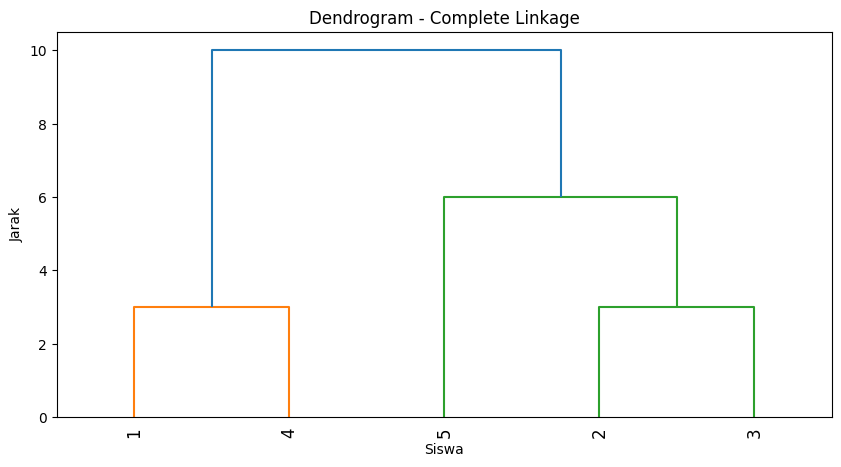

In [7]:
# Hierarchical Clustering (Complete Linkage)
complete_linkage = linkage(X, method='complete', metric='cityblock')
plt.figure(figsize=(10, 5))
dendrogram(complete_linkage, labels=df['Siswa'].values, leaf_rotation=90)
plt.title("Dendrogram - Complete Linkage")
plt.xlabel("Siswa")
plt.ylabel("Jarak")
plt.show()

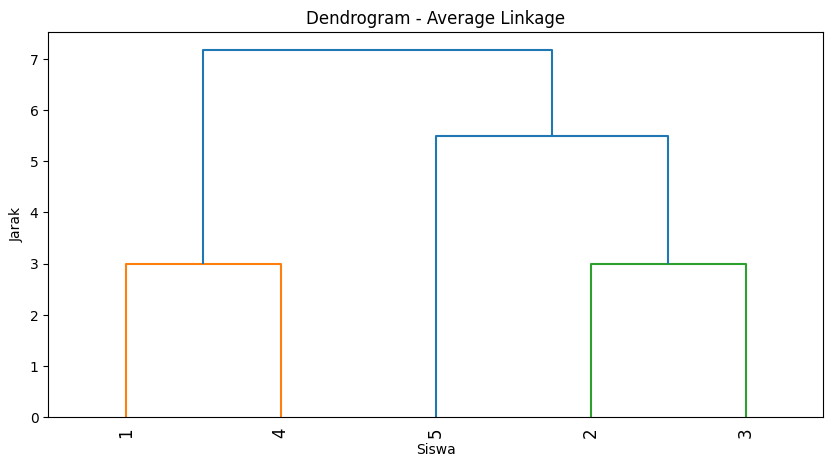

In [8]:
# Hierarchical Clustering (Average Linkage)
average_linkage = linkage(X, method='average', metric='cityblock')
plt.figure(figsize=(10, 5))
dendrogram(average_linkage, labels=df['Siswa'].values, leaf_rotation=90)
plt.title("Dendrogram - Average Linkage")
plt.xlabel("Siswa")
plt.ylabel("Jarak")
plt.show()